In [17]:
import os
import numpy
import SimpleITK
import matplotlib.pyplot as plt

def sitk_show(img, title=None, margin=0.05, dpi=40 ):
    nda = SimpleITK.GetArrayFromImage(img)
    spacing = img.GetSpacing()
    figsize = (1 + margin) * nda.shape[0] / dpi, (1 + margin) * nda.shape[1] / dpi
    extent = (0, nda.shape[1]*spacing[1], nda.shape[0]*spacing[0], 0)
    fig = plt.figure(figsize=figsize, dpi=dpi)
    ax = fig.add_axes([margin, margin, 1 - 2*margin, 1 - 2*margin])

    plt.set_cmap("gray")
    ax.imshow(nda,extent=extent,interpolation=None)
    
    if title:
        plt.title(title)
    
    plt.show()
    
path = 'data/interrsect_005.nii.gz'
path2 = '/Users/josephinebregazzi/Work/summer2023/MIPLAB/Brain-Scan-Example-Data/Interrsect/images/INTERRSeCT01-005_FollowUp.nii.gz'
path4 = '/Users/josephinebregazzi/Work/summer2023/MIPLAB/Brain-Scan-Example-Data/Interrsect/images/interrsect-01-005_stripped.nii.gz.nii.gz'
image_1_path = '/home/jbregazzi/Documents/josephine/GitHub/Brain-Scan-Example-Data/Interrsect/mini-dataset/INTERRSeCT01-019_FollowUp.nii.gz'
path3 = '/Users/josephinebregazzi/Work/summer2023/MIPLAB/Brain-Scan-Example-Data/Interrsect/interrsect-01-005_stripped.nii.gz.nii.gz'

reader = sitk.ImageFileReader()
reader.SetImageIO("NiftiImageIO")
reader.SetFileName(path2)
image = reader.Execute()

idxSlice = 10

# int labels to assign to the segmented white and gray matter.
labelWhiteMatter = 1
labelGrayMatter = 2




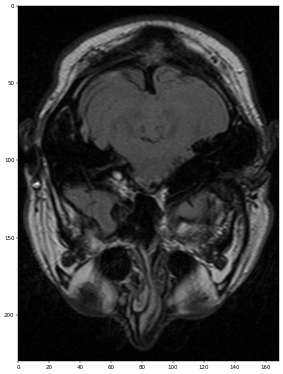

In [18]:
image = image[:,:,idxSlice]

sitk_show(image)

In [19]:
reader = sitk.ImageFileReader()
reader.SetImageIO("NiftiImageIO")
reader.SetFileName(path4)
image = reader.Execute()

RuntimeError: Exception thrown in SimpleITK ImageFileReader_Execute: /Users/runner/work/1/sitk-build/ITK/Modules/IO/NIFTI/src/itkNiftiImageIO.cxx:1039:
ITK ERROR: NiftiImageIO(0x7f858b207d50): /Users/josephinebregazzi/Work/summer2023/MIPLAB/Brain-Scan-Example-Data/Interrsect/images/interrsect-01-005_stripped.nii.gz.nii.gz is not recognized as a NIFTI file

In [4]:
# Define the radius of the structuring element for erosion
radius = (3,3,3)

# Perform binary erosion
eroded_image = SimpleITK.BinaryErode(image, radius)

for i in range(100):
    eroded_image = SimpleITK.BinaryErode(eroded_image, radius)

sitk_show(eroded_image)

RuntimeError: Exception thrown in SimpleITK BinaryErode: /tmp/SimpleITK/Code/Common/include/sitkMemberFunctionFactory.hxx:155:
sitk::ERROR: Pixel type: 32-bit float is not supported in 2D by N3itk6simple22BinaryErodeImageFilterE.

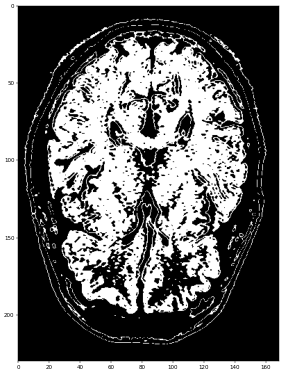

In [34]:
binary_image = sitk.BinaryThreshold(image, lowerThreshold=260, upperThreshold=340, insideValue=1, outsideValue=0)
sitk_show(binary_image)

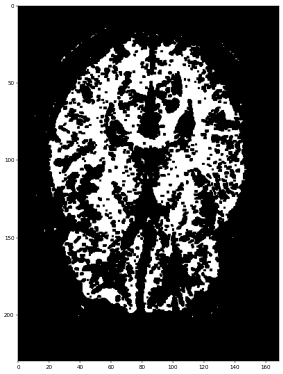

In [36]:
# Define the radius of the structuring element for erosion
radius = (1,1)

# Perform binary erosion
eroded_image = SimpleITK.BinaryErode(binary_image, radius)

sitk_show(eroded_image)

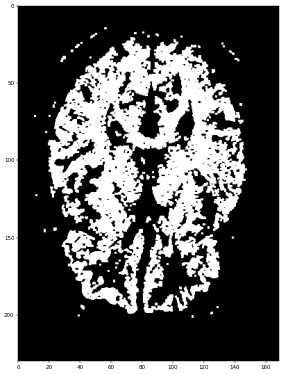

In [38]:
# Define the radius of the structuring element for erosion
radius = (1,1)

# Perform binary erosion
dilated_image = SimpleITK.BinaryDilate(eroded_image, radius)

sitk_show(dilated_image)

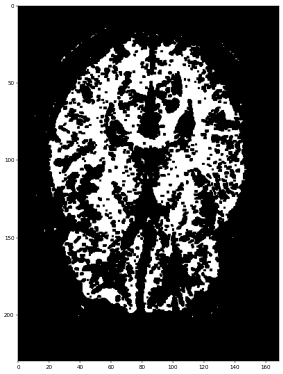

In [39]:
# Define the radius of the structuring element for erosion
radius = (1,1)

# Perform binary erosion
eroded_image2 = SimpleITK.BinaryErode(dilated_image, radius)

sitk_show(eroded_image2)

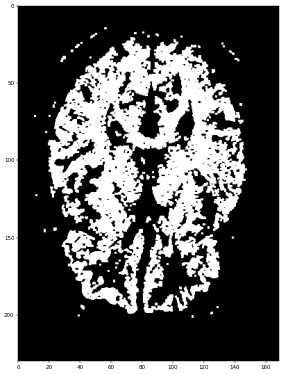

In [40]:
# Define the radius of the structuring element for erosion
radius = (1,1)

# Perform binary erosion
dilated_image2 = SimpleITK.BinaryDilate(eroded_image2, radius)

sitk_show(dilated_image2)